### Log Transformation

Text(0, 0.5, 'Occurrence')

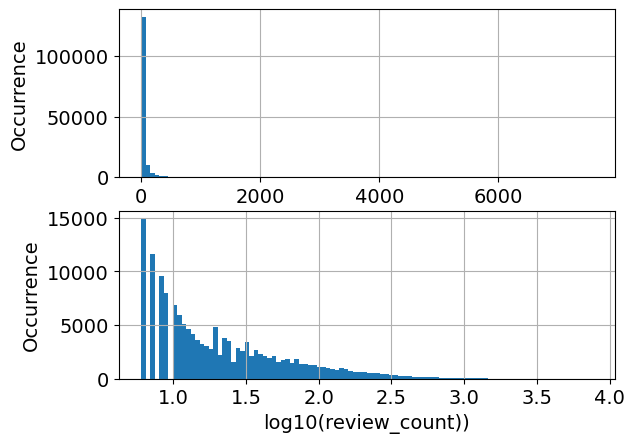

In [16]:
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

biz_file = open('/Users/ktxdev/Documents/Data/yelp_dataset/yelp_academic_dataset_business.json')
biz_df = pd.DataFrame([json.loads(x) for x in biz_file.readlines()])
biz_file.close()

fig, (ax1, ax2) = plt.subplots(2,1)
biz_df['review_count'].hist(ax=ax1, bins=100)
ax1.tick_params(labelsize=14)
ax1.set_xlabel('review_count', fontsize=14)
ax1.set_ylabel('Occurrence', fontsize=14)

biz_df['log_review_count'] = np.log10(biz_df['review_count'] + 1)

biz_df['log_review_count'].hist(ax=ax2, bins=100)
ax2.tick_params(labelsize=14)
ax2.set_xlabel('log10(review_count))', fontsize=14)
ax2.set_ylabel('Occurrence', fontsize=14)

## Online News Popularity Case Study

Text(0, 0.5, 'Number of Articles')

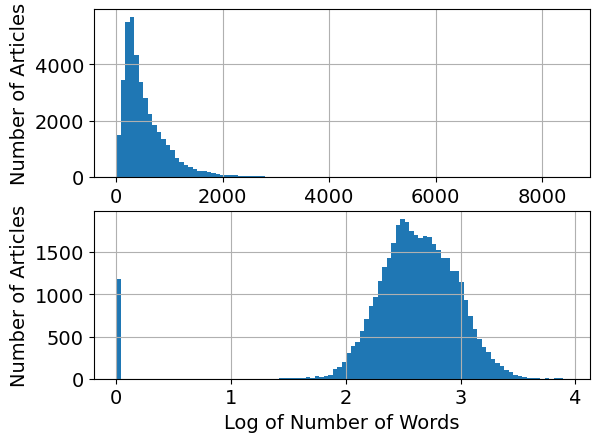

In [17]:
news_df = pd.read_csv("/Users/ktxdev/Documents/Data/online_news_popularity.csv")

fig, (ax1, ax2) = plt.subplots(2,1)
news_df[' n_tokens_content'].hist(ax=ax1, bins=100)
ax1.tick_params(labelsize=14)
ax1.set_xlabel('Number of Words in Article', fontsize=14)
ax1.set_ylabel('Number of Articles', fontsize=14)

news_df['log_n_tokens_content'] = np.log10(news_df[' n_tokens_content'] + 1)

news_df['log_n_tokens_content'].hist(ax=ax2, bins=100)
ax2.tick_params(labelsize=14)
ax2.set_xlabel('Log of Number of Words', fontsize=14)
ax2.set_ylabel('Number of Articles', fontsize=14)

## Using log transformed Yelp review counts to predict average business rating

In [18]:
from sklearn import linear_model
from sklearn.model_selection import cross_val_score

m_orig = linear_model.LinearRegression()
scores_orig = cross_val_score(m_orig, biz_df[['review_count']], biz_df['stars'], cv = 10)

m_log = linear_model.LinearRegression()
scores_log = cross_val_score(m_log, biz_df[['log_review_count']], biz_df['stars'], cv=10)

print("R-squared score without log transform: %0.5f (+/- %0.5f)" % (scores_orig.mean(), scores_orig.std() * 2))
print("R-squared score with log transform: %0.5f (+/- %0.5f)" % (scores_log.mean(), scores_log.std() * 2))

R-squared score without log transform: 0.00354 (+/- 0.00148)
R-squared score with log transform: 0.00257 (+/- 0.00128)


Text(0, 0.5, 'Average Star Rating')

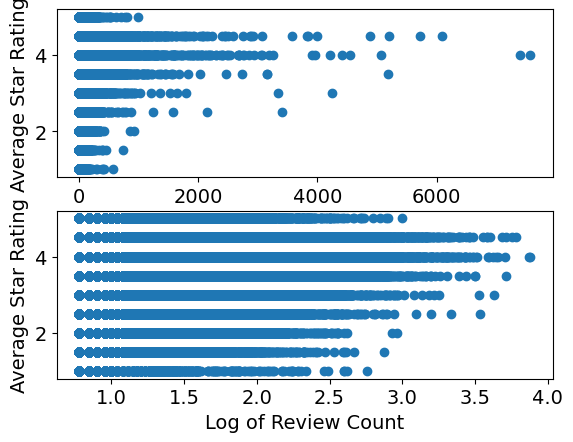

In [19]:
fig, (ax1, ax2) = plt.subplots(2,1)
ax1.scatter(biz_df['review_count'], biz_df['stars'])
ax1.tick_params(labelsize=14)
ax1.set_xlabel('Review Count', fontsize=14)
ax1.set_ylabel('Average Star Rating', fontsize=14)

ax2.scatter(biz_df['log_review_count'], biz_df['stars'])
ax2.tick_params(labelsize=14)
ax2.set_xlabel('Log of Review Count', fontsize=14)
ax2.set_ylabel('Average Star Rating', fontsize=14)

## Using log transformed word counts in the Online News Popularity dataset to predict article popularity

In [20]:
m_orig = linear_model.LinearRegression()
scores_orig = cross_val_score(m_orig, news_df[[' n_tokens_content']], news_df[' shares'], cv = 10)

m_log = linear_model.LinearRegression()
scores_log = cross_val_score(m_log, news_df[['log_n_tokens_content']], news_df[' shares'], cv = 10)

print("R-squared score without log transform: %0.5f (+/- %0.5f)" % (scores_orig.mean(), scores_orig.std() * 2))
print("R-squared score with log transform: %0.5f (+/- %0.5f)" % (scores_log.mean(), scores_log.std() * 2))

R-squared score without log transform: -0.00242 (+/- 0.00509)
R-squared score with log transform: -0.00114 (+/- 0.00418)


Text(0, 0.5, 'Number of Shares')

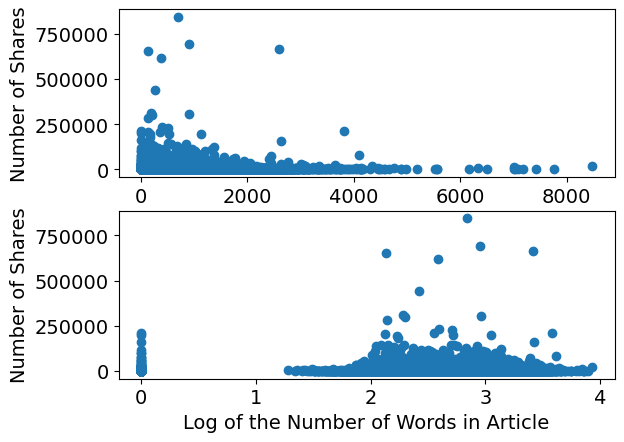

In [21]:
fig2, (ax1, ax2) = plt.subplots(2,1)
ax1.scatter(news_df[' n_tokens_content'], news_df[' shares'])
ax1.tick_params(labelsize=14)
ax1.set_xlabel('Number of Words in Article', fontsize=14)
ax1.set_ylabel('Number of Shares', fontsize=14)

ax2.scatter(news_df['log_n_tokens_content'], news_df[' shares'])
ax2.tick_params(labelsize=14)
ax2.set_xlabel('Log of the Number of Words in Article', fontsize=14)
ax2.set_ylabel('Number of Shares', fontsize=14)